### Testing Simulation Library

In [1]:
import simulation_library
import potentials
import integrators
import data_logging
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import visuals

plt.style.use("ggplot")
%matplotlib inline
system_builder = simulation_library.SystemFactory()

# Double Well Potential Simulation

In [2]:
# Build system 
system_dw = simulation_library.System(dim = 2)

# Define potentials used in system
wca = potentials.WCAPotential(1,1) # needed for making a particle object
system_dw.central_potential = potentials.DoubleWellPotential(a = 1,
                                                          b = 6,
                                                          c = 1,
                                                          d = 1)

# Place particles
system_dw.add_particle(simulation_library.Particle(wca, np.array([0,1])))

# Choose integration method w/ kwargs
system_dw.get_integrator("metropolis", None, temp = 0.5)

# Build and attach data logging objects
coords_logger_dw = data_logging.CoordinateLogger(system_dw, 100)
energy_logger_dw = data_logging.EnergyLogger(system_dw, 100)
system_dw.registerObserver(coords_logger_dw)
system_dw.registerObserver(energy_logger_dw)

In [3]:
# Run system
system_dw.run(100000)

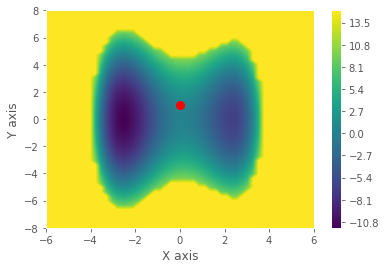

In [4]:
# Visual Trajectory
x_traj = np.array(coords_logger_dw.coordinates)
ani = visuals.make_2D_traj_potential(x_traj,
                               potential=system_dw.central_potential,
                              xlim = [-6, 6],
                              ylim = [-8, 8],
                              cutoff = 10)
ani

(array([  3.,  14.,  21.,  38.,  75.,  82.,  92., 114., 130., 111.,  97.,
         75.,  57.,  43.,  21.,   7.,   7.,   4.,   4.,   2.,   1.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-3.02999848, -2.96939851, -2.90879854, -2.84819858, -2.78759861,
        -2.72699864, -2.66639867, -2.6057987 , -2.54519873, -2.48459876,
        -2.42399879, -2.36339882, -2.30279885, -2.24219888, -2.18159891,
        -2.12099894, -2.06039897, -1.999799  , -1.93919903, -1.87859906,
        -1.81799909, -1.75739912, -1.69679915, -1.63619918, -1.57559921,
        -1.51499924, -1.45439927, -1.3937993 , -1.33319933, -1.27259936,
        -1.21199939, -1.15139942, -1.09079945, -1.03019948, -0.96959951,
        -0.90899955, -0.84839958, -0.78779961, -0.72719964, -0.66659967,
        -0.6059997 , -0.54539973, -0.48479976, -0.42419979, -0.36359982,
 

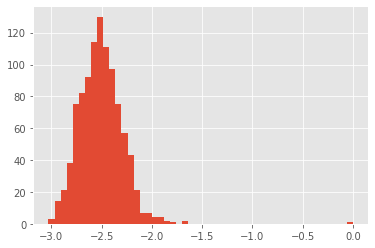

In [5]:
#Output data is in Data logging objects
plt.hist(np.array(coords_logger_dw.coordinates)[:,:,0], bins=50)

Text(0, 0.5, 'Energy')

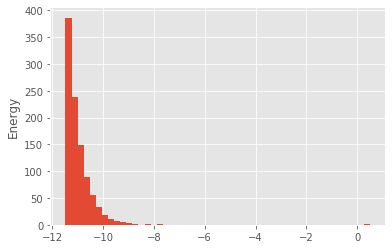

In [6]:
plt.hist(energy_logger_dw.H, bins=50)
plt.ylabel("Energy")

# Mueller Potential

In [7]:
# Build system 
system_mp = simulation_library.System(dim = 2)

# Add potentials + Particles to System
system_mp.central_potential = potentials.MuellerPotential(alpha = 0.1,
                             A = [-200, -100, -170, 15],
                             a = [-1, -1, -6.5, 0.7],
                             b = [0, 0, 11, 0.6],
                             c = [-10, -10, -6.5, 0.7],
                             xj = [1, 0, -0.5, -1],
                             yj = [0, 0.5, 1.5, 1]
                            )
system_mp.add_particle(simulation_library.Particle(wca, np.array([-0.5,1.5])))

# Add integrator & thermostat (This integrator needs a thermostat to be in NPT Ensemble)
system_mp.get_integrator("verlet", dt = 0.0001)
system_mp.get_thermostat("anderson", T = 1, freq = 100, colisions = 0.01)

# Create and add coordinate + energy loggers
coords_logger_mp = data_logging.CoordinateLogger(system_mp, 500)
energy_logger_mp = data_logging.EnergyLogger(system_mp, 500)
system_mp.registerObserver(coords_logger_mp)
system_mp.registerObserver(energy_logger_mp)

In [8]:
system_mp.run(100000)
system_mp.particles[0].loc = np.array([0, 0.5])
system_mp.run(100000)
system_mp.particles[0].loc = np.array([1, 0])
system_mp.run(100000)

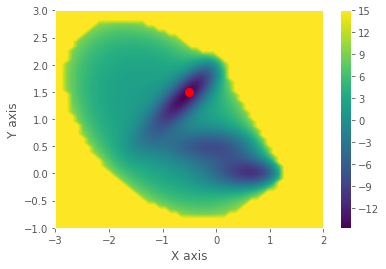

In [9]:
x_traj = np.array(coords_logger_mp.coordinates)
visuals.make_2D_traj_potential(x_traj,
                               potential=system_mp.central_potential,
                              xlim = [-3, 2],
                              ylim = [-1, 3],
                              cutoff = 10)

Text(0, 0.5, 'Counts')

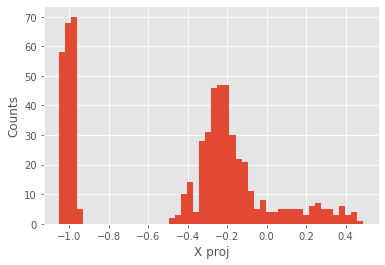

In [10]:
# Project xy coordinates to the (1, -1) vector
xy_data = np.array(coords_logger_mp.coordinates).reshape(-1,2)
x_proj = np.dot(xy_data, np.array([1,-1]))/np.dot([1,-1],[1,-1])
plt.hist(x_proj, bins=50)
plt.xlabel("X proj")
plt.ylabel("Counts")

(array([ 20.,  56.,  19.,  33.,   8.,  56.,   0.,   9.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  17.,   0.,
          0.,   0.,  11.,  73., 158.,  35.,  24.,  14.,   1.,  22.,   0.,
          0.,  13.,  11.,   0.,  18.,   0.,   3.]),
 array([-14.52727167, -14.25420673, -13.9811418 , -13.70807687,
        -13.43501193, -13.161947  , -12.88888206, -12.61581713,
        -12.34275219, -12.06968726, -11.79662232, -11.52355739,
        -11.25049245, -10.97742752, -10.70436258, -10.43129765,
        -10.15823271,  -9.88516778,  -9.61210285,  -9.33903791,
         -9.06597298,  -8.79290804,  -8.51984311,  -8.24677817,
         -7.97371324,  -7.7006483 ,  -7.42758337,  -7.15451843,
         -6.8814535 ,  -6.60838856,  -6.33532363,  -6.06225869,
         -5.78919376,  -5.51612883,  -5.24306389,  -4.96999896,
         -4.69693402,  -4.42386909,  -4.15080415,  -3.87773922,
         -3.60467428]),
 <a list of 40 Patch objects>)

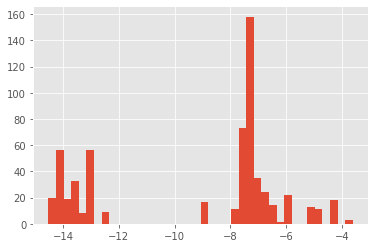

In [11]:
plt.hist(energy_logger_mp.H, bins=40)

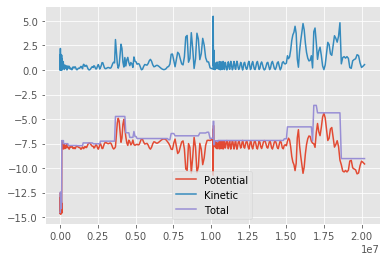

In [12]:
plt.plot(energy_logger_mp.steps, energy_logger_mp.U)
plt.plot(energy_logger_mp.steps, energy_logger_mp.K)
plt.plot(energy_logger_mp.steps, energy_logger_mp.H)
plt.legend(["Potential", "Kinetic", "Total"])

# Mueller Potential using a different Integrator

In [13]:
system_mp2 = simulation_library.System(dim = 2)
system_mp2.central_potential = potentials.MuellerPotential(alpha = 0.1,
                             A = [-200, -100, -170, 15],
                             a = [-1, -1, -6.5, 0.7],
                             b = [0, 0, 11, 0.6],
                             c = [-10, -10, -6.5, 0.7],
                             xj = [1, 0, -0.5, -1],
                             yj = [0, 0.5, 1.5, 1]
                            )
system_mp2.add_particle(simulation_library.Particle(wca, np.array([0,1.5])))

system_mp2.get_integrator("metropolis", dt = None, temp = 1)
coords_logger_mp2 = data_logging.CoordinateLogger(system_mp2, 500)
energy_logger_mp2 = data_logging.EnergyLogger(system_mp2, 500)
system_mp2.registerObserver(coords_logger_mp2)
system_mp2.registerObserver(energy_logger_mp2)

In [14]:
system_mp2.run(100000)
system_mp2.particles[0].loc = np.array([0, 0.5])
system_mp2.run(100000)
system_mp2.particles[0].loc = np.array([1, 0])
system_mp2.run(100000)

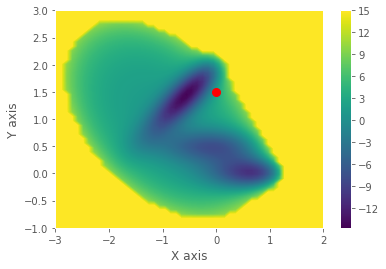

In [15]:
x_traj = np.array(coords_logger_mp2.coordinates)
visuals.make_2D_traj_potential(x_traj,
                               potential=system_mp2.central_potential,
                              xlim = [-3, 2],
                              ylim = [-1, 3],
                              cutoff = 10)

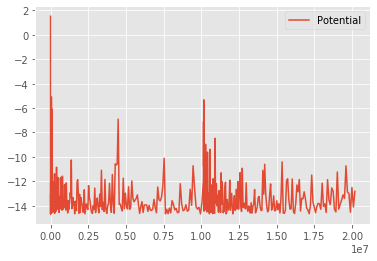

In [16]:
plt.plot(energy_logger_mp2.steps, energy_logger_mp2.H)
plt.legend(["Potential"])

In [17]:
coords = np.array(coords_logger_mp2.coordinates)


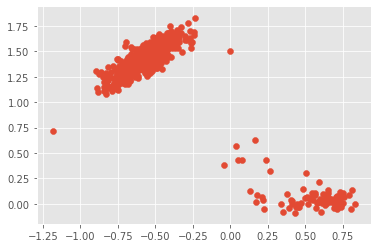

In [18]:
plt.scatter(*coords.T.squeeze())